<a href="https://colab.research.google.com/github/18mis7023/NCAA-Basket-Ball-Prediction/blob/main/NCAA_Basket_Ball_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***DATA MINING AND DATA WAREHOUSE PROJECT***

# ***Google Cloud & NCAA® March Madness Analytics***

### Amrutha Macharla       20BCE7391



***Preprocessing Used In the Project:***

1.Removed NA values 

2.removed un necessarly columns

3.removed noisy data 

4.removed outliers
 
5.recoded the data 

6.Removed Outliers from the data 
 
7.Removed Duplicate Rows

***MACHINE LEARNING ALGORITHIMS USED IN THE PROJECT:-***

1.Linear Regression 

2.KNN

3.Random Forest

4.Navie Bayers Classifier

5.Decession Tree

6.Logistic Regression

***Highest Accuracy Results got in the Logistic is 98%***

***and KNN got 92% accuracy results***

## ***ATTRIBUTE DETAILS IN THE TABLE***

**EventID**:- It is a unique id for the dataset

**Season**:-It describes the when the match happen like in which season the match had done

**DayNum**:On which day the match had be held between 2 teams

**WTeamID**:ID of winning Team ID

**LTeamID**:ID of Loosing Team ID

**WFinalScore**:Final Scores of winning Teams

**LFinalScore**:Final Scores of Loosing Teams

**WCurrentScore,LCurrentScore**:Current score for bore winning team and loosing team calculated per every Event

**ElapsedSeconds**:The time taken by teams to complete one match inj a day

**EventType**:The event occured in the match for every 2 to 3 sec event type is noted

**EventTeamID**:The event made by the particular set of people

**EventPlayerID**:The event made by the particular player Id is noted down


In [ ]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Mevents2015=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEvents2015.csv")
Mevents2016=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEvents2016.csv")
Mevents2017=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEvents2017.csv")
Mevents2018=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEvents2018.csv")
Mevents2019=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEvents2019.csv")

Merging Of the All CSV Files to one Data file using Pandas


In [ ]:
Mevents2015.tail(5)

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
2561214,2561215,2015,154,1181,1458,68,63,68,63,2386,1458,15263,reb,def,0,0,0
2561215,2561216,2015,154,1181,1458,68,63,68,63,2394,1458,15250,miss3,unk,0,0,0
2561216,2561217,2015,154,1181,1458,68,63,68,63,2394,1458,15254,reb,off,0,0,0
2561217,2561218,2015,154,1181,1458,68,63,68,63,2400,1458,15256,miss3,unk,0,0,0
2561218,2561219,2015,154,1181,1458,68,63,68,63,2400,1181,3275,reb,def,0,0,0


In [ ]:
Mevents2016.head(5)

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,2561220,2016,11,1104,1244,77,64,0,0,13,1104,173,miss2,lay,0,0,0
1,2561221,2016,11,1104,1244,77,64,0,0,13,1104,173,reb,off,0,0,0
2,2561222,2016,11,1104,1244,77,64,0,0,16,1244,6076,foul,unk,0,0,0
3,2561223,2016,11,1104,1244,77,64,0,0,16,1104,173,miss1,unk,0,0,0
4,2561224,2016,11,1104,1244,77,64,0,0,16,1104,0,reb,deadb,0,0,0


In [ ]:
Mevents2017.head(2)

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,5215634,2017,11,1104,1157,70,53,0,0,0,1104,156,sub,in,0,0,0
1,5215635,2017,11,1104,1157,70,53,0,0,15,1157,2236,foul,unk,0,0,0


In [ ]:
Mevents2018.head(2)

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,7857252,2018,11,1104,1272,82,70,3,0,15,1104,150,made3,unk,0,0,0
1,7857253,2018,11,1104,1272,82,70,3,0,15,1104,148,assist,NaN,0,0,0


In [ ]:
Mevents2019.head(2)

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,10446169,2019,1,1104,1380,82,62,0,2,18,1380,12013,made2,jump,0,0,0
1,10446170,2019,1,1104,1380,82,62,0,2,18,1380,12005,assist,NaN,0,0,0


In [ ]:
data=pd.concat([Mevents2015,Mevents2016])
#data.head(10) #two files merged
#so concat all the csv file to do preprocess 
#every file is continution to another file as shown above
data=pd.concat([data,Mevents2017])
data=pd.concat([data,Mevents2018])
data=pd.concat([data,Mevents2019])
data.head(5)

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,1103,1420,74,57,0,0,19,1103,112,miss3,unk,0,0,0
1,2,2015,11,1103,1420,74,57,0,0,19,1420,13747,reb,def,0,0,0
2,3,2015,11,1103,1420,74,57,0,2,27,1420,13753,made2,dunk,0,0,0
3,4,2015,11,1103,1420,74,57,0,2,27,1420,13770,assist,NaN,0,0,0
4,5,2015,11,1103,1420,74,57,2,2,59,1103,98,made2,jump,0,0,0


In [ ]:
data

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,1,2015,11,1103,1420,74,57,0,0,19,1103,112,miss3,unk,0,0,0
1,2,2015,11,1103,1420,74,57,0,0,19,1420,13747,reb,def,0,0,0
2,3,2015,11,1103,1420,74,57,0,2,27,1420,13753,made2,dunk,0,0,0
3,4,2015,11,1103,1420,74,57,0,2,27,1420,13770,assist,NaN,0,0,0
4,5,2015,11,1103,1420,74,57,2,2,59,1103,98,made2,jump,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708421,13154590,2019,154,1438,1403,85,77,9,3,424,1438,14505,sub,in,0,0,0
2708422,13154591,2019,154,1438,1403,85,77,9,3,424,1403,12983,sub,out,0,0,0
2708423,13154592,2019,154,1438,1403,85,77,9,3,424,1403,13004,sub,in,0,0,0
2708424,13154593,2019,154,1438,1403,85,77,9,3,424,1403,13007,sub,out,0,0,0


# Applying Preprocess Tecqniques for the combined dataset

Comming to next it is one type of pre processing as we have to do multile types of pre process to check and get accurate values

In [ ]:
#size or length or dimensions of the dataset(no.of rows and columns)
data.shape

(13154594, 17)

In [ ]:
#display coums of the data
data.columns

Index(['EventID', 'Season', 'DayNum', 'WTeamID', 'LTeamID', 'WFinalScore',
       'LFinalScore', 'WCurrentScore', 'LCurrentScore', 'ElapsedSeconds',
       'EventTeamID', 'EventPlayerID', 'EventType', 'EventSubType', 'X', 'Y',
       'Area'],
      dtype='object')

In [ ]:
#checking Dataset info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13154594 entries, 0 to 2708425
Data columns (total 17 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   EventID         int64 
 1   Season          int64 
 2   DayNum          int64 
 3   WTeamID         int64 
 4   LTeamID         int64 
 5   WFinalScore     int64 
 6   LFinalScore     int64 
 7   WCurrentScore   int64 
 8   LCurrentScore   int64 
 9   ElapsedSeconds  int64 
 10  EventTeamID     int64 
 11  EventPlayerID   int64 
 12  EventType       object
 13  EventSubType    object
 14  X               int64 
 15  Y               int64 
 16  Area            int64 
dtypes: int64(15), object(2)
memory usage: 1.8+ GB
None


In [ ]:
#checking Null Values
data.isnull()
#got false

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708421,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2708422,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2708423,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2708424,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#count the null values in the data set
data.isna().sum()
#after observing data containg Null values we can decide that EventSubType has so many rows containing NULL values

EventID                 0
Season                  0
DayNum                  0
WTeamID                 0
LTeamID                 0
WFinalScore             0
LFinalScore             0
WCurrentScore           0
LCurrentScore           0
ElapsedSeconds          0
EventTeamID             0
EventPlayerID           0
EventType               0
EventSubType      1325244
X                       0
Y                       0
Area                    0
dtype: int64

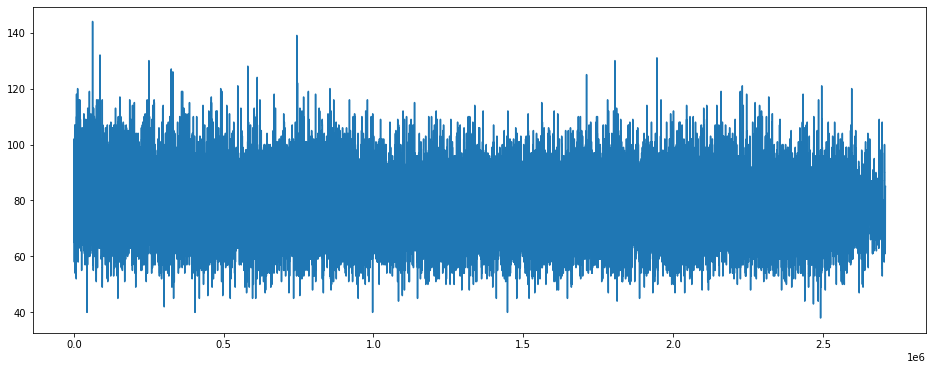

In [ ]:
data['WFinalScore'].plot(figsize=(16,6))

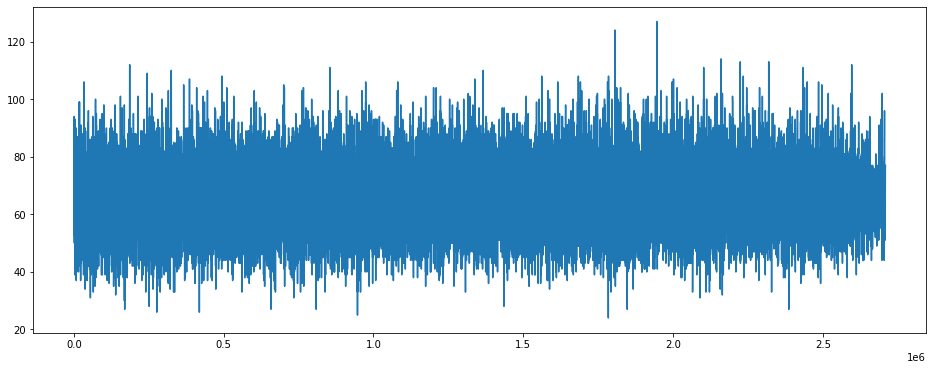

In [ ]:
data['LFinalScore'].plot(figsize=(16,6))

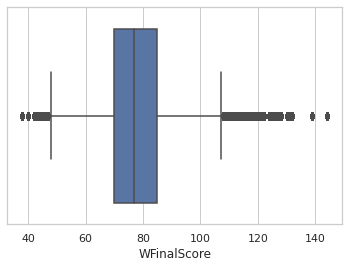

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["WFinalScore"])

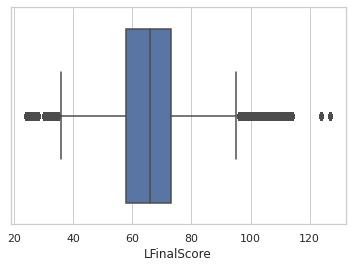

In [ ]:
ax = sns.boxplot(x=data["LFinalScore"])

In [ ]:
#Creating duplicate data set for safe 
datadup=data
datadup.columns
# data.columns

Index(['EventID', 'Season', 'DayNum', 'WTeamID', 'LTeamID', 'WFinalScore',
       'LFinalScore', 'WCurrentScore', 'LCurrentScore', 'ElapsedSeconds',
       'EventTeamID', 'EventPlayerID', 'EventType', 'EventSubType', 'X', 'Y',
       'Area'],
      dtype='object')

In [ ]:
#@title Removing the un necessary coloums called X,Y,Area { form-width: "30%", display-mode: "both" }

#in the above data we dont need the X,Y,Area colums
datadup.drop(["X", "Y","Area"], axis = 1, inplace = True)

In [ ]:
datadup       #After removing the useless Columns

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType
0,1,2015,11,1103,1420,74,57,0,0,19,1103,112,miss3,unk
1,2,2015,11,1103,1420,74,57,0,0,19,1420,13747,reb,def
2,3,2015,11,1103,1420,74,57,0,2,27,1420,13753,made2,dunk
3,4,2015,11,1103,1420,74,57,0,2,27,1420,13770,assist,NaN
4,5,2015,11,1103,1420,74,57,2,2,59,1103,98,made2,jump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708421,13154590,2019,154,1438,1403,85,77,9,3,424,1438,14505,sub,in
2708422,13154591,2019,154,1438,1403,85,77,9,3,424,1403,12983,sub,out
2708423,13154592,2019,154,1438,1403,85,77,9,3,424,1403,13004,sub,in
2708424,13154593,2019,154,1438,1403,85,77,9,3,424,1403,13007,sub,out


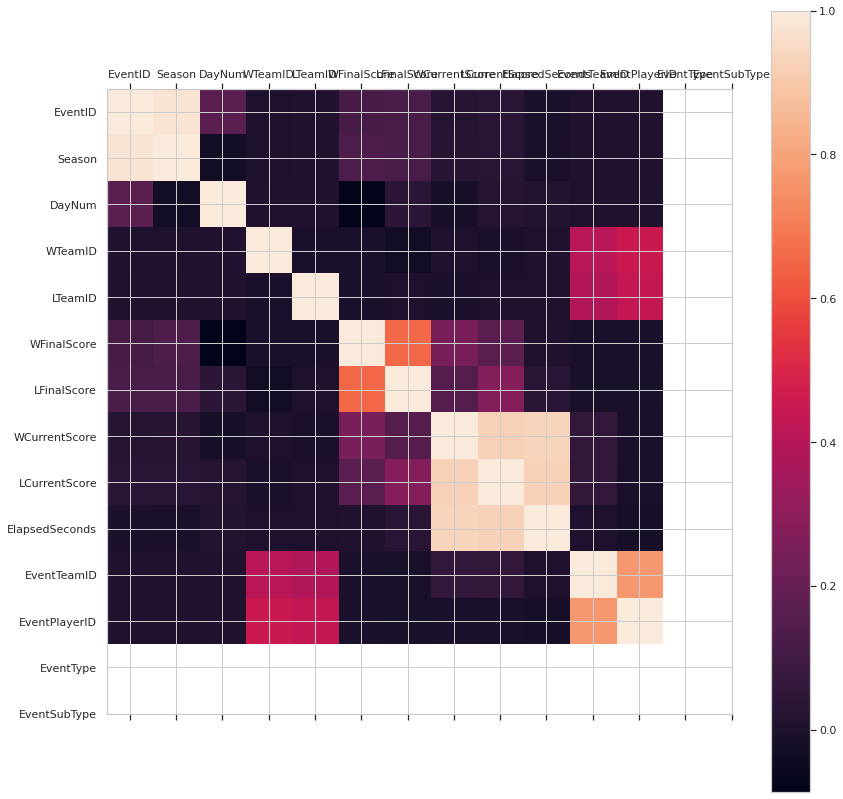

In [ ]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(datadup.corr())
plt.yticks(np.arange(datadup.shape[1]), datadup.columns)
plt.xticks(np.arange(datadup.shape[1]), datadup.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecb0d24b00>,
      dtype=object)

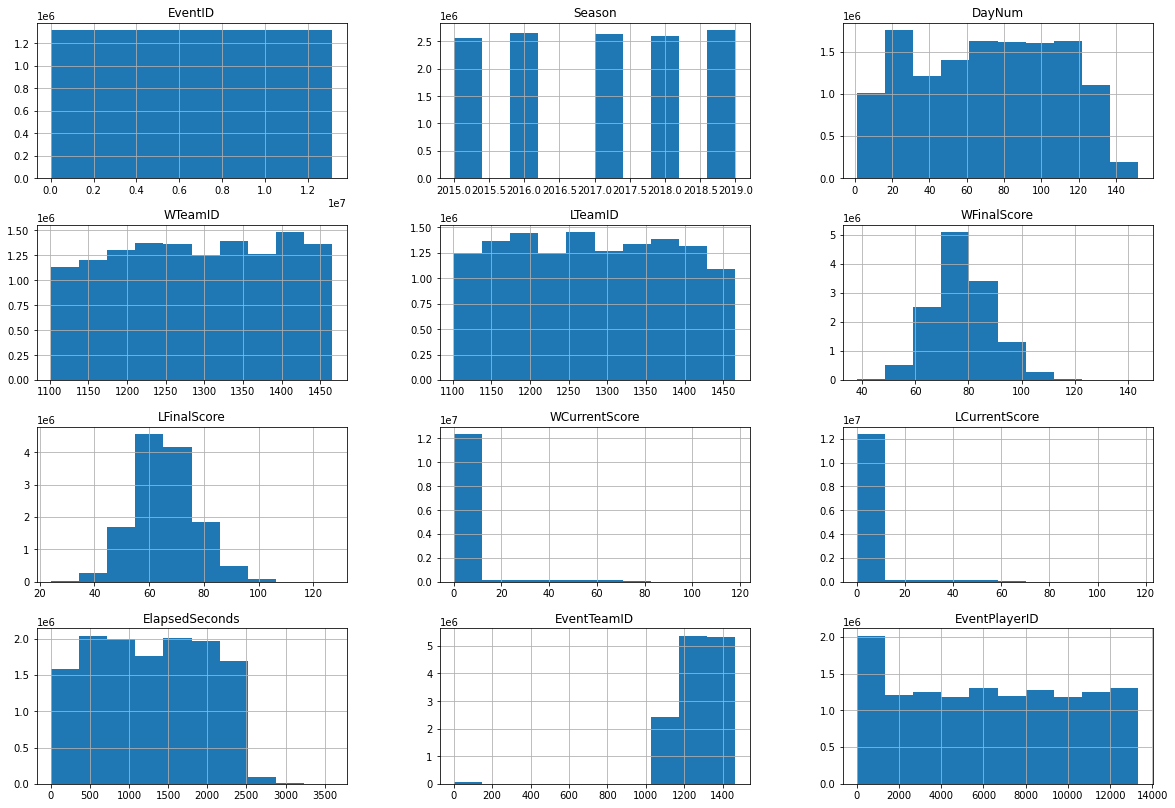

In [ ]:
datadup.hist()

In [ ]:
# rcParams['figure.figsize'] = 8,6
# plt.bar(datadup['WFinalScore'].unique(), datadup['WFinalScore'].value_counts(), color = ['green', 'orange'])
# plt.xticks([0, 1])
# plt.xlabel('Target Classes')
# plt.ylabel('Count')
# plt.title('Count of each Target Class')

In [ ]:
#@title Removing NAN Values { form-width: "20%" }
#Removing NAN values in the event type column checking howmany are there in the dataset with null values
datadup.isna().sum()
#so there are 1324605 rows are removing

EventID                 0
Season                  0
DayNum                  0
WTeamID                 0
LTeamID                 0
WFinalScore             0
LFinalScore             0
WCurrentScore           0
LCurrentScore           0
ElapsedSeconds          0
EventTeamID             0
EventPlayerID           0
EventType               0
EventSubType      1325244
dtype: int64

In [ ]:
#Because it is a type of string and there is no class that we can predict the value of missing data so there is another when there is more data and after deleting also the prediction result doest effect anything
datadup=datadup.dropna()
# checking after removing the NA values from the column EventSubType
datadup.isna().sum()

EventID           0
Season            0
DayNum            0
WTeamID           0
LTeamID           0
WFinalScore       0
LFinalScore       0
WCurrentScore     0
LCurrentScore     0
ElapsedSeconds    0
EventTeamID       0
EventPlayerID     0
EventType         0
EventSubType      0
dtype: int64

In [ ]:
datadup.shape

(11829350, 14)

In [ ]:
#checking for Empty values in the dataset of each column
np.where(datadup.applymap(lambda x: x == ' '))
#by seeing output we can tell there is no empty spaces in the dataset

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
#in the Wcurrentscore and Lcurrent score there is no use of both 0's at same row because no action was taken place nothing is predicted from those 0's
# data=data[-(which(data$WCurrentScore==0 & data$LCurrentScore==0)),]
datadup =datadup[datadup['WCurrentScore'] !=0]
datadup =datadup[datadup['LCurrentScore'] !=0]
datadup

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType
4,5,2015,11,1103,1420,74,57,2,2,59,1103,98,made2,jump
5,6,2015,11,1103,1420,74,57,2,2,72,1420,13747,turnover,unk
7,8,2015,11,1103,1420,74,57,2,2,75,1420,13770,foul,unk
8,9,2015,11,1103,1420,74,57,4,2,94,1103,104,made2,jump
9,10,2015,11,1103,1420,74,57,4,4,101,1420,13753,made2,lay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708421,13154590,2019,154,1438,1403,85,77,9,3,424,1438,14505,sub,in
2708422,13154591,2019,154,1438,1403,85,77,9,3,424,1403,12983,sub,out
2708423,13154592,2019,154,1438,1403,85,77,9,3,424,1403,13004,sub,in
2708424,13154593,2019,154,1438,1403,85,77,9,3,424,1403,13007,sub,out


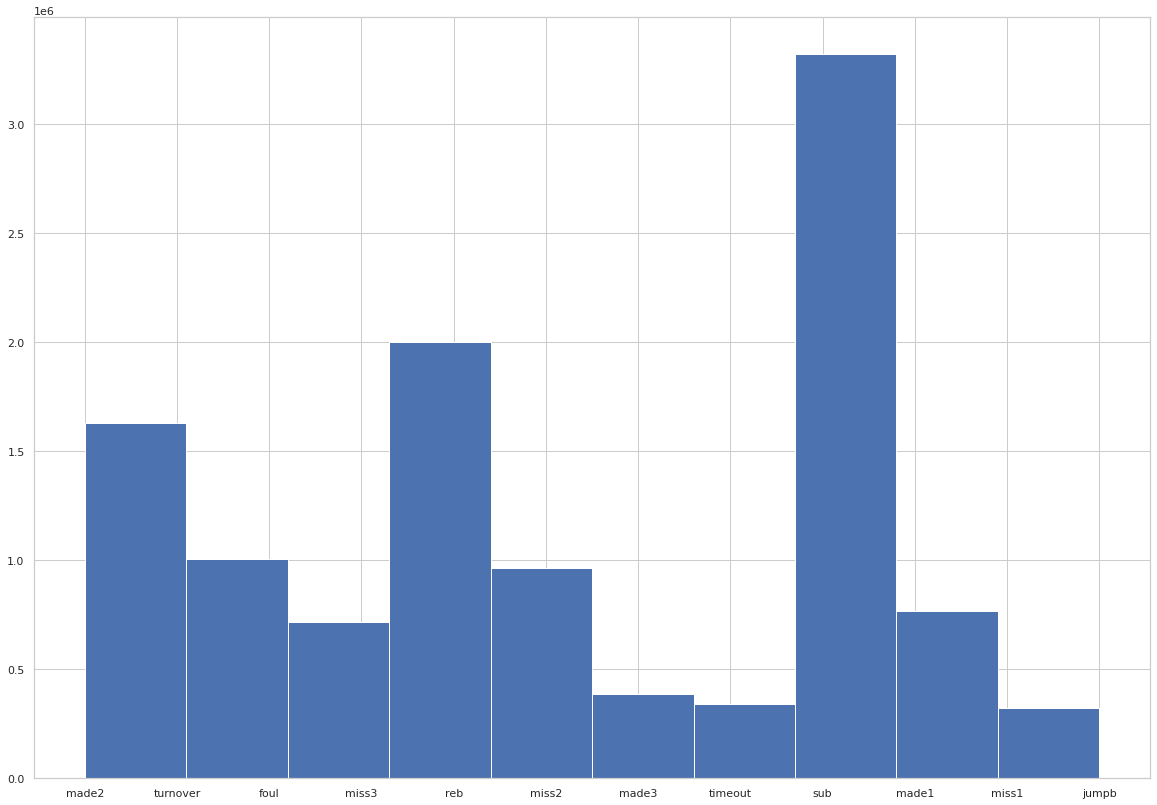

In [ ]:
datadup['EventType'].hist()

In [ ]:
ax = sns.boxplot(x=data["WFinalScore"])

In [ ]:
ay=sns.boxplot(x=data["LFinalScore"])

In [ ]:
datadup.groupby('EventType').size()

EventType
foul        1003608
jumpb          2352
made1        768608
made2        954388
made3        387446
miss        2000834
sub         3323259
timeout      338622
turnover     672536
dtype: int64

In [ ]:
#by observing the output there we need only made1,made2 and made3 where points will come for predictions
#remove remaing data in it
# datadup =datadup[(datadup['EventType'] !="foul")]
# datadup =datadup[(datadup['EventType'] !="jumpb")]
# datadup =datadup[(datadup['EventType'] !="miss1")]
# datadup =datadup[(datadup['EventType'] !="miss2")]
# datadup =datadup[(datadup['EventType'] !="miss3")]
# datadup =datadup[(datadup['EventType'] !="sub")]
# datadup =datadup[(datadup['EventType'] !="timeout")]
# datadup =datadup[(datadup['EventType'] !="turnover")]
datadup['EventType'].replace({'miss1': 'miss','miss2': 'miss','miss3': 'miss'},inplace = True)
#reb event type data not usefull as checking in the data set there no effect on class label
datadup =datadup[(datadup['EventType'] !="reb")]
datadup


,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType
4,5,2015,11,1103,1420,74,57,2,2,59,1103,98,made2,jump
5,6,2015,11,1103,1420,74,57,2,2,72,1420,13747,turnover,unk
7,8,2015,11,1103,1420,74,57,2,2,75,1420,13770,foul,unk
8,9,2015,11,1103,1420,74,57,4,2,94,1103,104,made2,jump
9,10,2015,11,1103,1420,74,57,4,4,101,1420,13753,made2,lay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708421,13154590,2019,154,1438,1403,85,77,9,3,424,1438,14505,sub,in
2708422,13154591,2019,154,1438,1403,85,77,9,3,424,1403,12983,sub,out
2708423,13154592,2019,154,1438,1403,85,77,9,3,424,1403,13004,sub,in
2708424,13154593,2019,154,1438,1403,85,77,9,3,424,1403,13007,sub,out


In [ ]:
datadup.shape

(9451653, 14)

In [ ]:
data.shape

(13154594, 14)

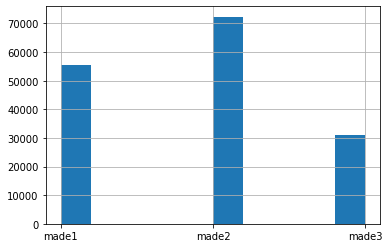

In [ ]:
datadup['EventType'].hist()

In [ ]:
datadup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159057 entries, 2236 to 2706967
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventID         159057 non-null  int64 
 1   Season          159057 non-null  int64 
 2   DayNum          159057 non-null  int64 
 3   WTeamID         159057 non-null  int64 
 4   LTeamID         159057 non-null  int64 
 5   WFinalScore     159057 non-null  int64 
 6   LFinalScore     159057 non-null  int64 
 7   WCurrentScore   159057 non-null  int64 
 8   LCurrentScore   159057 non-null  int64 
 9   ElapsedSeconds  159057 non-null  int64 
 10  EventTeamID     159057 non-null  int64 
 11  EventPlayerID   159057 non-null  int64 
 12  EventType       159057 non-null  object
 13  EventSubType    159057 non-null  object
dtypes: int64(12), object(2)
memory usage: 18.2+ MB


In [ ]:
datadup.groupby('EventType').size()

EventType
foul        1003608
jumpb          2352
made1        768608
made2        954388
made3        387446
miss        2000834
sub         3323259
timeout      338622
turnover     672536
dtype: int64

In [ ]:
datadup.groupby('EventSubType').size()

In [ ]:
#for preprossing to get better predictiong the string value is going to convert to integer so that the system will threat this coloum also as normal 
#comming to dataset we have to columns which are of object type contain strings 
#1)above EventType has 3 variables call made1,made2,made3
    #remaing all types are removed because we need to calculate the points so made1 means gaining 1 point like that made2 means 2 points and made3 means 3 points
#2)EventSubType  

In [ ]:
datadup['Season'].replace({2015: 1, 2016: 2,2017:3,2018:4,2019:5},inplace = True)
datadup.groupby('Season').size()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Season
1    1856115
2    1916961
3    1917637
4    1873790
5    1887150
dtype: int64

Like above Preprocess The predictions will not be good so doing in the another way 

In [ ]:
#from above we are loosing so much of data due to event types and null values of the event type colums 
#so predictions are not good and data loss is more so going with another process of preprocessing tecqnique

# ***2ND Type of preprocessing procedure***


In [ ]:
#Mainly in the data set there are two Class labels called WFinalScore and LFinalScore
#comming to the class label there is so much of redundancy data like duplicated values as shown below

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

In [ ]:
Mevents2015=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEvents2015.csv")
Mevents2016=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEvents2016.csv")
Mevents2017=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEvents2017.csv")
Mevents2018=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEvents2018.csv")
Mevents2019=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEvents2019.csv")

In [ ]:
data=pd.concat([Mevents2015,Mevents2016])
#data.head(10) #two files merged
#so concat all the csv file to do preprocess 
#every file is continution to another file as shown above
data=pd.concat([data,Mevents2017])
data=pd.concat([data,Mevents2018])
data=pd.concat([data,Mevents2019])
data.tail(5)

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType,X,Y,Area
2708421,13154590,2019,154,1438,1403,85,77,9,3,424,1438,14505,sub,in,0,0,0
2708422,13154591,2019,154,1438,1403,85,77,9,3,424,1403,12983,sub,out,0,0,0
2708423,13154592,2019,154,1438,1403,85,77,9,3,424,1403,13004,sub,in,0,0,0
2708424,13154593,2019,154,1438,1403,85,77,9,3,424,1403,13007,sub,out,0,0,0
2708425,13154594,2019,154,1438,1403,85,77,9,3,424,1403,12980,sub,in,0,0,0


In [ ]:
data.shape

(13154594, 17)

In [ ]:
datapro1=data

In [ ]:
#@title dropping not useful columns from the data set { form-width: "20%" }
#X.Y.Area columns are going to removed
datapro1.drop(["X", "Y","Area"], axis = 1, inplace = True)

In [ ]:
#@title Removing NAN Values { form-width: "20%" }
#Removing NAN values in the event type column checking howmany are there in the dataset with null values
datapro1.isna().sum()
#so there are 1324605 rows are removing

EventID                 0
Season                  0
DayNum                  0
WTeamID                 0
LTeamID                 0
WFinalScore             0
LFinalScore             0
WCurrentScore           0
LCurrentScore           0
ElapsedSeconds          0
EventTeamID             0
EventPlayerID           0
EventType               0
EventSubType      1325244
dtype: int64

In [ ]:
#Because it is a type of string and there is no class that we can predict the value of missing data so there is another when there is more data and after deleting also the prediction result doest effect anything
datapro1=datapro1.dropna()
# checking after removing the NA values from the column EventSubType
datapro1.isna().sum()

EventID           0
Season            0
DayNum            0
WTeamID           0
LTeamID           0
WFinalScore       0
LFinalScore       0
WCurrentScore     0
LCurrentScore     0
ElapsedSeconds    0
EventTeamID       0
EventPlayerID     0
EventType         0
EventSubType      0
dtype: int64

In [ ]:
#removing 0's in the EventPlayerID because we cant predict the eventids
datapro1=datapro1[datapro1['EventPlayerID']!=0]

In [ ]:
datapro1.sort_values(["WFinalScore", "LFinalScore"], ascending = (False, True))

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType
62265,2623485,2016,12,1139,1154,144,71,0,0,14,1139,1482,miss2,lay
62266,2623486,2016,12,1139,1154,144,71,0,0,14,1154,2091,reb,def
62267,2623487,2016,12,1139,1154,144,71,0,0,23,1154,2114,miss3,unk
62268,2623488,2016,12,1139,1154,144,71,0,0,23,1139,1495,reb,def
62269,2623489,2016,12,1139,1154,144,71,3,0,37,1139,1475,made3,unk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492237,2492238,2015,132,1209,1204,38,36,37,36,2379,1209,4524,made1,unk
2492238,2492239,2015,132,1209,1204,38,36,38,36,2379,1209,4524,made1,unk
2492239,2492240,2015,132,1209,1204,38,36,38,36,2393,1204,4323,miss3,unk
2492240,2492241,2015,132,1209,1204,38,36,38,36,2393,1204,4314,reb,off


In [ ]:
final_data = datapro1.drop_duplicates(subset={"WTeamID","LTeamID"})

In [ ]:
final_data

,EventID,Season,DayNum,WTeamID,LTeamID,WFinalScore,LFinalScore,WCurrentScore,LCurrentScore,ElapsedSeconds,EventTeamID,EventPlayerID,EventType,EventSubType
0,1,2015,11,1103,1420,74,57,0,0,19,1103,112,miss3,unk
488,489,2015,11,1104,1406,82,54,0,0,4,1406,13121,miss2,lay
992,993,2015,11,1112,1291,78,55,3,0,18,1112,506,made3,unk
1480,1481,2015,11,1113,1152,86,50,0,0,30,1113,511,miss3,unk
1966,1967,2015,11,1119,1102,84,78,3,0,16,1119,787,made3,unk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704928,13151097,2019,149,1177,1378,100,96,0,0,38,1177,3112,miss2,lay
2705470,13151639,2019,150,1267,1453,90,70,0,0,13,1453,15035,miss2,jump
2707073,13153242,2019,152,1403,1277,61,51,8,8,367,1277,7508,sub,out
2707519,13153688,2019,152,1438,1120,63,62,10,13,472,1438,14480,miss2,jump


In [ ]:
datapro1.shape

(11078086, 14)

In [ ]:
final_data.shape

(12139, 14)

In [ ]:
#here by seeing above data reduction just i removed duplicates of data and it is reduced to 100lakh data to 10k  rows of data 
#lets check for more pre process tecqnique for better process
#here there is no need of current scores 
#Event player id also no need because duplicate rows are removed so the data of player id also lost
#Event Team Id also no need so i am gonna remove that also


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12139 entries, 0 to 2707920
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EventID         12139 non-null  int64 
 1   Season          12139 non-null  int64 
 2   DayNum          12139 non-null  int64 
 3   WTeamID         12139 non-null  int64 
 4   LTeamID         12139 non-null  int64 
 5   WFinalScore     12139 non-null  int64 
 6   LFinalScore     12139 non-null  int64 
 7   WCurrentScore   12139 non-null  int64 
 8   LCurrentScore   12139 non-null  int64 
 9   ElapsedSeconds  12139 non-null  int64 
 10  EventTeamID     12139 non-null  int64 
 11  EventPlayerID   12139 non-null  int64 
 12  EventType       12139 non-null  object
 13  EventSubType    12139 non-null  object
dtypes: int64(12), object(2)
memory usage: 1.4+ MB


In [ ]:
final_data.drop(["EventSubType","WCurrentScore","LCurrentScore","EventID"], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12139 entries, 0 to 2707920
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Season          12139 non-null  int64 
 1   DayNum          12139 non-null  int64 
 2   WTeamID         12139 non-null  int64 
 3   LTeamID         12139 non-null  int64 
 4   WFinalScore     12139 non-null  int64 
 5   LFinalScore     12139 non-null  int64 
 6   ElapsedSeconds  12139 non-null  int64 
 7   EventTeamID     12139 non-null  int64 
 8   EventPlayerID   12139 non-null  int64 
 9   EventType       12139 non-null  object
dtypes: int64(9), object(1)
memory usage: 1.0+ MB


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


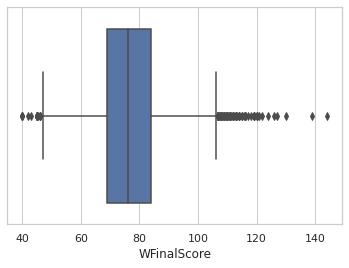

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=final_data["WFinalScore"])

In [ ]:
# removing Outliers
final_data=final_data[final_data['WFinalScore']>47]
final_data=final_data[ final_data['WFinalScore']<105]

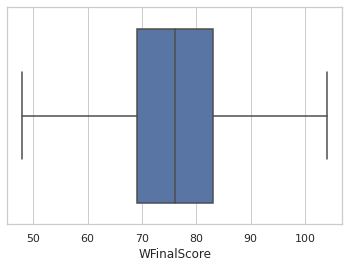

In [ ]:
ax = sns.boxplot(x=final_data["WFinalScore"])

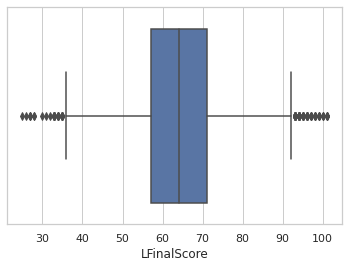

In [ ]:
ax = sns.boxplot(x=final_data["LFinalScore"])

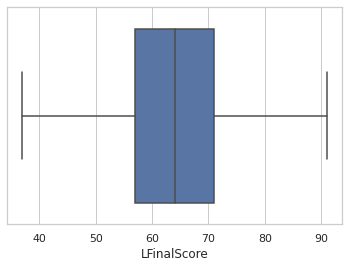

In [ ]:
# removing Outliers
final_data=final_data[final_data['LFinalScore']>36]
final_data=final_data[ final_data['LFinalScore']<92]
ax = sns.boxplot(x=final_data["LFinalScore"])

In [ ]:
final_data.groupby('Season').size()

Season
2015    4368
2016    2360
2017    1848
2018    1663
2019    1558
dtype: int64

In [ ]:
#@title rescaling the data for better predictions { form-width: "20%" }
final_data['Season'].replace({2015: 1, 2016: 2,2017:3,2018:4,2019:5},inplace = True)
final_data.groupby('Season').size()

Season
1    4368
2    2360
3    1848
4    1663
5    1558
dtype: int64

# ***ML Algorithims***

# 1.Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
dataml1=final_data
dataml1.shape

(11797, 10)

In [ ]:
final_data.columns

Index(['Season', 'DayNum', 'WTeamID', 'LTeamID', 'WFinalScore', 'LFinalScore',
       'ElapsedSeconds', 'EventTeamID', 'EventPlayerID', 'EventType'],
      dtype='object')

In [ ]:
#@title dividing Data for WFinal Score { form-width: "20%" }
dataw_y1=final_data[['WFinalScore']]
dataw_x1=final_data[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds','EventPlayerID']]

In [ ]:
x_wtrain,x_wtest,y_wtrain,y_wtest=train_test_split(dataw_x1,dataw_y1,test_size=0.2,random_state=0)
print(x_wtrain)
print(x_wtest)
print(y_wtrain)
print(y_wtest)

         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds  EventPlayerID
2671000       5     137     1332     1458              36          15271
799185        1      48     1209     1379              25          11918
390917        1      25     1458     1328              16          15250
232284        4      19     1403     1130              23          12987
2610967       3     138     1196     1438              14           3950
...         ...     ...      ...      ...             ...            ...
287800        2      21     1451     1141              18           1586
1629108       1      89     1313     1214              16           9063
920361        4      53     1305     1356              26          10875
398112        5      18     1296     1331              20           9790
1348947       1      75     1453     1178              27           3151

[9437 rows x 6 columns]
         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds  EventPlayerID
434096        5      19   

In [ ]:
#@title dividing Data for LFinal Score { form-width: "20%" }
datal_y1=final_data[['LFinalScore']]
datal_x1=final_data[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds']]

In [ ]:
x_ltrain,x_ltest,y_ltrain,y_ltest=train_test_split(datal_x1,datal_y1,test_size=0.2,random_state=0)
print(x_ltrain)
print(x_ltest)
print(y_ltrain)
print(y_ltest)

         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds
2671000       5     137     1332     1458              36
799185        1      48     1209     1379              25
390917        1      25     1458     1328              16
232284        4      19     1403     1130              23
2610967       3     138     1196     1438              14
...         ...     ...      ...      ...             ...
287800        2      21     1451     1141              18
1629108       1      89     1313     1214              16
920361        4      53     1305     1356              26
398112        5      18     1296     1331              20
1348947       1      75     1453     1178              27

[9437 rows x 5 columns]
         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds
434096        5      19     1317     1389              18
796366        1      48     1136     1176              16
293445        3      22     1102     1391              12
1046800       1      62     1442     1303      

In [ ]:
#@title Calculated win or loose in the form of true or false for test data { form-width: "20%" }
Trainingresult=y_wtest['WFinalScore']>y_ltest['LFinalScore']
Trainingresult

434096     True
796366     True
293445     True
1046800    True
134704     True
           ... 
592539     True
2601815    True
688191     True
1391792    True
1644283    True
Length: 2360, dtype: bool

Applying Naive Bayes Algorithim for the Class Labels WfinalScore and LFinalScore to predict WIN or LOOSE 

In [ ]:
#@title WFinalScore Prediction { form-width: "20%" }
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x_wtrain,y_wtrain)  # perform linear regression
yw_pred = linear_regressor.predict(x_wtest)
print(yw_pred)
print(linear_regressor.coef_)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_wtest, yw_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_wtest, yw_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_wtest, yw_pred)))

[[80.85722408]
 [74.38508778]
 [77.841816  ]
 ...
 [79.85033417]
 [73.74775853]
 [73.48240672]]
[[ 1.52977401e+00 -2.06625852e-02  6.69965557e-04 -7.05730772e-04
  -2.37105644e-03 -1.92596085e-05]]
Mean Absolute Error: 8.054187156822364
Mean Squared Error: 99.31987997414375
Root Mean Squared Error: 9.965935980837111


In [ ]:
#@title WFinalScore Prediction { form-width: "20%" }
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x_ltrain,y_ltrain)  # perform linear regression
yl_pred = linear_regressor.predict(x_ltest)
print(yl_pred)
print(linear_regressor.coef_)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_ltest, yl_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_ltest, yl_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_ltest, yl_pred)))

[[66.70193128]
 [62.32025116]
 [64.89801591]
 ...
 [66.09069774]
 [62.25334625]
 [62.34655238]]
[[ 1.29057387  0.01963857 -0.00324484  0.00179303 -0.0028483 ]]
Mean Absolute Error: 8.065494294138466
Mean Squared Error: 99.26444403266791
Root Mean Squared Error: 9.963154321431938


By seeing above results Mean Squared error say it is highly predictions we got but it is final score so may there will be more variance but comparing these Wfinal score and LFinalScore

But calculating Win or Loose is the main task for our predictions that after calculating the win and loose data of accuracy.we got 100% accuracy

Predicting The Win or Loose Accuracy

In [ ]:
testingresult=yw_pred>yl_pred
testingresult

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
print("Accuracy",accuracy_score(Trainingresult,testingresult)*100)

Accuracy 100.0


# ***2.KNN***

*For Class Label's WFinal Score And LFinalScore*

We are predicting the **WIN** or ***LOOSE***

In [ ]:
#import required packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
datapro1=final_data

In [ ]:
datapro1.columns

Index(['Season', 'DayNum', 'WTeamID', 'LTeamID', 'WFinalScore', 'LFinalScore',
       'ElapsedSeconds', 'EventTeamID', 'EventPlayerID', 'EventType'],
      dtype='object')

In [ ]:
#@title dividing Data for WFinal Score { form-width: "20%" }
dataw_y1=datapro1[['WFinalScore']]
dataw_x1=datapro1[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds','EventTeamID','EventPlayerID']]

In [ ]:
x_wtrain,x_wtest,y_wtrain,y_wtest=train_test_split(dataw_x1,dataw_y1,test_size=0.2,random_state=0)
print(x_wtrain)
print(x_wtest)
print(y_wtrain)
print(y_wtest)

         Season  DayNum  WTeamID  ...  ElapsedSeconds  EventTeamID  EventPlayerID
2671000       5     137     1332  ...              36         1458          15271
799185        1      48     1209  ...              25         1379          11918
390917        1      25     1458  ...              16         1458          15250
232284        4      19     1403  ...              23         1403          12987
2610967       3     138     1196  ...              14         1196           3950
...         ...     ...      ...  ...             ...          ...            ...
287800        2      21     1451  ...              18         1141           1586
1629108       1      89     1313  ...              16         1313           9063
920361        4      53     1305  ...              26         1356          10875
398112        5      18     1296  ...              20         1331           9790
1348947       1      75     1453  ...              27         1178           3151

[9437 rows x 7 

In [ ]:
#@title dividing Data for LFinal Score { form-width: "20%" }
datal_y1=datapro1[['LFinalScore']]
datal_x1=datapro1[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds','EventTeamID','EventPlayerID']]

In [ ]:
x_ltrain,x_ltest,y_ltrain,y_ltest=train_test_split(datal_x1,datal_y1,test_size=0.2,random_state=0)
print(x_ltrain)
print(x_ltest)
print(y_ltrain)
print(y_ltest)

         Season  DayNum  WTeamID  ...  ElapsedSeconds  EventTeamID  EventPlayerID
2671000       5     137     1332  ...              36         1458          15271
799185        1      48     1209  ...              25         1379          11918
390917        1      25     1458  ...              16         1458          15250
232284        4      19     1403  ...              23         1403          12987
2610967       3     138     1196  ...              14         1196           3950
...         ...     ...      ...  ...             ...          ...            ...
287800        2      21     1451  ...              18         1141           1586
1629108       1      89     1313  ...              16         1313           9063
920361        4      53     1305  ...              26         1356          10875
398112        5      18     1296  ...              20         1331           9790
1348947       1      75     1453  ...              27         1178           3151

[9437 rows x 7 

In [ ]:
#@title Calculated win or loose in the form of true or false for test data { form-width: "20%" }
Trainingresult=y_wtest['WFinalScore']>y_ltest['LFinalScore']
Trainingresult

In [ ]:
#@title WFinalScore Prediction { form-width: "20%" }
classifier = KNeighborsClassifier(n_neighbors =5 , metric = 'minkowski',p = 2)
classifier.fit(x_wtrain,y_wtrain)
y_wpredict = classifier.predict(x_wtest)
y_wpredict

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([61, 62, 60, ..., 82, 61, 63])

In [ ]:
#@title LFinalScore Prediction { form-width: "20%" }
classifier = KNeighborsClassifier(n_neighbors =5 , metric = 'minkowski',p = 2)
classifier.fit(x_ltrain,y_ltrain)
y_lpredict = classifier.predict(x_ltest)
y_lpredict

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([55, 60, 60, ..., 58, 50, 47])

In [ ]:
testingresult=y_wpredict>y_lpredict
testingresult

array([ True,  True, False, ...,  True,  True,  True])

Accuracy of winning and loosing data


In [ ]:
#@title We got the accuracy 91.6% { form-width: "20%" }
accuracy_score(Trainingresult,testingresult)

0.9165254237288135

# ***3.RANDOM FOREST***

In [ ]:
#Required Packages for this Algorithim
from sklearn.ensemble import RandomForestClassifier

Class Labels are WFinalScore and LFinalScore

finally based on two class labels we are going to predict the win loose based on win or loose accuracy we are deciding

In [ ]:
dataml3=final_data

In [ ]:
final_data.columns

Index(['Season', 'DayNum', 'WTeamID', 'LTeamID', 'WFinalScore', 'LFinalScore',
       'ElapsedSeconds', 'EventTeamID', 'EventPlayerID', 'EventType'],
      dtype='object')

In [ ]:
#@title dividing Data for WFinal Score { form-width: "20%" }
dataw_y1=final_data[['WFinalScore']]
dataw_x1=final_data[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds','EventTeamID','EventPlayerID']]

In [ ]:
x_wtrain,x_wtest,y_wtrain,y_wtest=train_test_split(dataw_x1,dataw_y1,test_size=0.2,random_state=0)
print(x_wtrain)
print(x_wtest)
print(y_wtrain)
print(y_wtest)

         Season  DayNum  WTeamID  ...  ElapsedSeconds  EventTeamID  EventPlayerID
2671000       5     137     1332  ...              36         1458          15271
799185        1      48     1209  ...              25         1379          11918
390917        1      25     1458  ...              16         1458          15250
232284        4      19     1403  ...              23         1403          12987
2610967       3     138     1196  ...              14         1196           3950
...         ...     ...      ...  ...             ...          ...            ...
287800        2      21     1451  ...              18         1141           1586
1629108       1      89     1313  ...              16         1313           9063
920361        4      53     1305  ...              26         1356          10875
398112        5      18     1296  ...              20         1331           9790
1348947       1      75     1453  ...              27         1178           3151

[9437 rows x 7 

In [ ]:
#@title dividing Data for LFinal Score { form-width: "20%" }
datal_y1=final_data[['LFinalScore']]
# datal_y1
datal_x1=final_data[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds','EventTeamID','EventPlayerID']]
# datal_x1

In [ ]:
x_ltrain,x_ltest,y_ltrain,y_ltest=train_test_split(datal_x1,datal_y1,test_size=0.2,random_state=0)
print(x_ltrain)
print(x_ltest)
print(y_ltrain)
print(y_ltest)

         Season  DayNum  WTeamID  ...  ElapsedSeconds  EventTeamID  EventPlayerID
2671000       5     137     1332  ...              36         1458          15271
799185        1      48     1209  ...              25         1379          11918
390917        1      25     1458  ...              16         1458          15250
232284        4      19     1403  ...              23         1403          12987
2610967       3     138     1196  ...              14         1196           3950
...         ...     ...      ...  ...             ...          ...            ...
287800        2      21     1451  ...              18         1141           1586
1629108       1      89     1313  ...              16         1313           9063
920361        4      53     1305  ...              26         1356          10875
398112        5      18     1296  ...              20         1331           9790
1348947       1      75     1453  ...              27         1178           3151

[9437 rows x 7 

In [ ]:
#@title Calculated win or loose in the form of true or false for test data { form-width: "20%" }
Trainingresult=y_wtest['WFinalScore']>y_ltest['LFinalScore']
Trainingresult

434096     True
796366     True
293445     True
1046800    True
134704     True
           ... 
592539     True
2601815    True
688191     True
1391792    True
1644283    True
Length: 2360, dtype: bool

**Applying Random Forest Algorithim for the Class Labels**

**Prediction for WFinalScore**

In [ ]:
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_wtrain,y_wtrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#@title WFinalScore Prediction { form-width: "20%" }
y_wpredict = classifier.predict(x_wtest)
y_wpredict

array([85, 80, 60, ..., 82, 72, 75])

**Prediction for WFinalScore**

In [ ]:
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_ltrain,y_ltrain)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#@title LFinalScore Prediction { form-width: "20%" }
y_wpredict = classifier.predict(x_wtest)
y_wpredict

array([57, 47, 48, ..., 66, 59, 51])

Checking accuracy of predicted data for WIN or LOOSE

In [ ]:
testingresult=y_wpredict>y_lpredict
testingresult

array([ True, False, False, ...,  True,  True,  True])

In [ ]:
#@title We got the accuracy 62.6% { form-width: "20%" }
accuracy_score(Trainingresult,testingresult)

0.6262711864406779

#***4.Naive Bayes Classifier***

In [ ]:
from sklearn import metrics 
from sklearn.naive_bayes import GaussianNB

In [ ]:
dataml4=final_data
dataml4.shape

(11797, 10)

In [ ]:
final_data.columns

Index(['Season', 'DayNum', 'WTeamID', 'LTeamID', 'WFinalScore', 'LFinalScore',
       'ElapsedSeconds', 'EventTeamID', 'EventPlayerID', 'EventType'],
      dtype='object')

In [ ]:
#@title dividing Data for WFinal Score { form-width: "20%" }
dataw_y1=final_data[['WFinalScore']]
# dataw_y1
dataw_x1=final_data[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds','EventPlayerID']]
# dataw_x1

In [ ]:
x_wtrain,x_wtest,y_wtrain,y_wtest=train_test_split(dataw_x1,dataw_y1,test_size=0.2,random_state=0)
print(x_wtrain)
print(x_wtest)
print(y_wtrain)
print(y_wtest)

         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds  EventPlayerID
2671000       5     137     1332     1458              36          15271
799185        1      48     1209     1379              25          11918
390917        1      25     1458     1328              16          15250
232284        4      19     1403     1130              23          12987
2610967       3     138     1196     1438              14           3950
...         ...     ...      ...      ...             ...            ...
287800        2      21     1451     1141              18           1586
1629108       1      89     1313     1214              16           9063
920361        4      53     1305     1356              26          10875
398112        5      18     1296     1331              20           9790
1348947       1      75     1453     1178              27           3151

[9437 rows x 6 columns]
         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds  EventPlayerID
434096        5      19   

In [ ]:
#@title dividing Data for LFinal Score { form-width: "20%" }
datal_y1=final_data[['LFinalScore']]
# datal_y1
datal_x1=final_data[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds']]
# datal_x1

In [ ]:
x_ltrain,x_ltest,y_ltrain,y_ltest=train_test_split(datal_x1,datal_y1,test_size=0.2,random_state=0)
print(x_ltrain)
print(x_ltest)
print(y_ltrain)
print(y_ltest)

         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds
2671000       5     137     1332     1458              36
799185        1      48     1209     1379              25
390917        1      25     1458     1328              16
232284        4      19     1403     1130              23
2610967       3     138     1196     1438              14
...         ...     ...      ...      ...             ...
287800        2      21     1451     1141              18
1629108       1      89     1313     1214              16
920361        4      53     1305     1356              26
398112        5      18     1296     1331              20
1348947       1      75     1453     1178              27

[9437 rows x 5 columns]
         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds
434096        5      19     1317     1389              18
796366        1      48     1136     1176              16
293445        3      22     1102     1391              12
1046800       1      62     1442     1303      

In [ ]:
#@title Calculated win or loose in the form of true or false for test data { form-width: "20%" }
Trainingresult=y_wtest['WFinalScore']>y_ltest['LFinalScore']
Trainingresult

Applying Naive Bayes Algorithim for the Class Labels WfinalScore and LFinalScore to predict WIN or LOOSE 

In [ ]:
#@title WFinalScore Prediction { form-width: "20%" }
gnb=GaussianNB()
gnb.fit(x_wtrain, y_wtrain)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# making predictions on the testing set 
y_wpred = gnb.predict(x_wtest)
y_wpred

array([98, 58, 93, ..., 97, 58, 58])

In [ ]:
#@title WFinalScore Prediction { form-width: "20%" }
gnb=GaussianNB()
gnb.fit(x_ltrain, y_ltrain)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# making predictions on the testing set 
y_lpred = gnb.predict(x_ltest)
y_lpred

array([66, 48, 48, ..., 77, 48, 48])

Predicting The Win or Loose Accuracy

In [ ]:
testingresult=y_wpred>y_lpred
testingresult

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
#@title Prediction result Accuracy 94.5% { form-width: "20%" }
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Trainingresult, testingresult)*100)

Gaussian Naive Bayes model accuracy(in %): 94.57627118644068


# ***5.SVM***

In [ ]:
# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier"

In [ ]:
dataml5=final_data
dataml5.shape

(11797, 10)

In [ ]:
final_data.columns

Index(['Season', 'DayNum', 'WTeamID', 'LTeamID', 'WFinalScore', 'LFinalScore',
       'ElapsedSeconds', 'EventTeamID', 'EventPlayerID', 'EventType'],
      dtype='object')

In [ ]:
#@title dividing Data for WFinal Score { form-width: "20%" }
dataw_y1=final_data[['WFinalScore']]
# dataw_y1
dataw_x1=final_data[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds',]]
# dataw_x1

In [ ]:
x_wtrain,x_wtest,y_wtrain,y_wtest=train_test_split(dataw_x1,dataw_y1,test_size=0.2,random_state=0)
print(x_wtrain)
print(x_wtest)
print(y_wtrain)
print(y_wtest)

         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds
2671000       5     137     1332     1458              36
799185        1      48     1209     1379              25
390917        1      25     1458     1328              16
232284        4      19     1403     1130              23
2610967       3     138     1196     1438              14
...         ...     ...      ...      ...             ...
287800        2      21     1451     1141              18
1629108       1      89     1313     1214              16
920361        4      53     1305     1356              26
398112        5      18     1296     1331              20
1348947       1      75     1453     1178              27

[9437 rows x 5 columns]
         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds
434096        5      19     1317     1389              18
796366        1      48     1136     1176              16
293445        3      22     1102     1391              12
1046800       1      62     1442     1303      

In [ ]:
#@title dividing Data for LFinal Score { form-width: "20%" }
datal_y1=final_data[['LFinalScore']]
# datal_y1
datal_x1=final_data[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds','EventPlayerID']]
# datal_x1

In [ ]:
x_ltrain,x_ltest,y_ltrain,y_ltest=train_test_split(datal_x1,datal_y1,test_size=0.2,random_state=0)
print(x_ltrain)
print(x_ltest)
print(y_ltrain)
print(y_ltest)

         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds  EventPlayerID
2671000       5     137     1332     1458              36          15271
799185        1      48     1209     1379              25          11918
390917        1      25     1458     1328              16          15250
232284        4      19     1403     1130              23          12987
2610967       3     138     1196     1438              14           3950
...         ...     ...      ...      ...             ...            ...
287800        2      21     1451     1141              18           1586
1629108       1      89     1313     1214              16           9063
920361        4      53     1305     1356              26          10875
398112        5      18     1296     1331              20           9790
1348947       1      75     1453     1178              27           3151

[9437 rows x 6 columns]
         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds  EventPlayerID
434096        5      19   

In [ ]:
#@title Calculated win or loose in the form of true or false for test data { form-width: "20%" }
Trainingresult=y_wtest['WFinalScore']>y_ltest['LFinalScore']
Trainingresult

Applying SVM Algorithim for the class labels

In [ ]:
#@title Prediction for WFinalScore Class Label { form-width: "20%" }
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
svmclf = svm.SVC(gamma='scale') # support vector machine
svmclf.fit(x_wtrain,y_wtrain)
svmw_predicted=logistic.predict(x_wtest)

I dont know why it is stopping here

when running the below code it is running with out stop so i stopped this algorithim

In [ ]:
#@title Prediction for WFinalScore Class Label { form-width: "20%" }
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
svmclf = svm.SVC(gamma='scale') # support vector machine
svmclf.fit(x_ltrain,y_ltrain)
svml_predicted=logistic.predict(x_ltest)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
testingresult=svmw_predicted>svml_predicted
print(svml_predicted)
print(svmw_predicted)

[64 94 64 ... 94 94 94]
[64 94 64 ... 94 94 94]


In [ ]:
#@title Prediction result Accuracy { form-width: "20%" }
print("Support Vector Machine model accuracy(in %):", metrics.accuracy_score(Trainingresult, testingresult)*100)

Support Vector Machine model accuracy(in %): 0.0


# ***6.Decession Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


In [ ]:
dataml6=final_data
dataml6.shape

(11797, 10)

In [ ]:
final_data.columns

Index(['Season', 'DayNum', 'WTeamID', 'LTeamID', 'WFinalScore', 'LFinalScore',
       'ElapsedSeconds', 'EventTeamID', 'EventPlayerID', 'EventType'],
      dtype='object')

In [ ]:
#@title dividing Data for WFinal Score { form-width: "20%" }
dataw_y1=final_data[['WFinalScore']]
# dataw_y1
dataw_x1=final_data[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds']]
# dataw_x1

In [ ]:
x_wtrain,x_wtest,y_wtrain,y_wtest=train_test_split(dataw_x1,dataw_y1,test_size=0.2,random_state=0)
# print(x_wtrain)
# print(x_wtest)
# print(y_wtrain)
# print(y_wtest)

In [ ]:
#@title dividing Data for LFinal Score { form-width: "20%" }
datal_y1=final_data[['LFinalScore']]
# datal_y1
datal_x1=final_data[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds']]
# datal_x1

In [ ]:
x_ltrain,x_ltest,y_ltrain,y_ltest=train_test_split(datal_x1,datal_y1,test_size=0.2,random_state=0)
print(x_ltrain)
print(x_ltest)
print(y_ltrain)
print(y_ltest)

         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds
2671000       5     137     1332     1458              36
799185        1      48     1209     1379              25
390917        1      25     1458     1328              16
232284        4      19     1403     1130              23
2610967       3     138     1196     1438              14
...         ...     ...      ...      ...             ...
287800        2      21     1451     1141              18
1629108       1      89     1313     1214              16
920361        4      53     1305     1356              26
398112        5      18     1296     1331              20
1348947       1      75     1453     1178              27

[9437 rows x 5 columns]
         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds
434096        5      19     1317     1389              18
796366        1      48     1136     1176              16
293445        3      22     1102     1391              12
1046800       1      62     1442     1303      

In [ ]:
#@title Calculated win or loose in the form of true or false for test data { form-width: "20%" }
Trainingresult=y_wtest['WFinalScore']>y_ltest['LFinalScore']
Trainingresult

In [ ]:
decisiontree = DecisionTreeClassifier(random_state=42) # decision tree
decisiontree.fit(x_wtrain, y_wtrain)
decisiontreew_predicted = decisiontree.predict(x_wtest)
# print('Training Score:',decisiontree.score(x_wtrain, y_wtrain))
# print('Test Score:',decisiontree.score(x_wtest, y_wtest))
# print('Accuracy:',accuracy_score(y_wtest, decisiontreew_predicted)*100)
# print('Confusion Matrix: \n',confusion_matrix(y_wtest,decisiontreew_predicted))

In [ ]:
decisiontreew_predicted

array([85, 82, 87, ..., 65, 83, 84])

In [ ]:
decisiontree = DecisionTreeClassifier(random_state=42) # decision tree
decisiontree.fit(x_ltrain, y_ltrain)
decisiontreel_predicted = decisiontree.predict(x_ltest)

In [ ]:
decisiontreel_predicted

array([78, 77, 70, ..., 63, 53, 70])

In [ ]:
testingresult=decisiontreew_predicted>decisiontreel_predicted
testingresult

array([ True,  True,  True, ...,  True,  True,  True])

Here i have checked in another by removing EventId also then i got better accuracy than before prediction

before prediction got 79.31 but after removing the EventId column from training the system got more accuracy 80.38% after removing outliers 80.16%is the accuracy

In [ ]:
#@title Prediction Result Accuracy 80.16 { form-width: "20%" }
print('Accuracy:',accuracy_score(Trainingresult,testingresult)*100)

Accuracy: 80.16949152542374


# ***7.Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [ ]:
dataml7=final_data
dataml7.shape

(11797, 10)

In [ ]:
final_data.columns

Index(['Season', 'DayNum', 'WTeamID', 'LTeamID', 'WFinalScore', 'LFinalScore',
       'ElapsedSeconds', 'EventTeamID', 'EventPlayerID', 'EventType'],
      dtype='object')

In [ ]:
#@title dividing Data for WFinal Score { form-width: "20%" }
dataw_y1=final_data[['WFinalScore']]
# dataw_y1
dataw_x1=final_data[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds']]
# dataw_x1

In [ ]:
x_wtrain,x_wtest,y_wtrain,y_wtest=train_test_split(dataw_x1,dataw_y1,test_size=0.2,random_state=0)
# print(x_wtrain)
# print(x_wtest)
# print(y_wtrain)
# print(y_wtest)

In [ ]:
#@title dividing Data for LFinal Score { form-width: "20%" }
datal_y1=final_data[['LFinalScore']]
# datal_y1
datal_x1=final_data[['Season','DayNum','WTeamID','LTeamID','ElapsedSeconds']]
# datal_x1

In [ ]:
x_ltrain,x_ltest,y_ltrain,y_ltest=train_test_split(datal_x1,datal_y1,test_size=0.2,random_state=0)
print(x_ltrain)
print(x_ltest)
print(y_ltrain)
print(y_ltest)

         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds
2671000       5     137     1332     1458              36
799185        1      48     1209     1379              25
390917        1      25     1458     1328              16
232284        4      19     1403     1130              23
2610967       3     138     1196     1438              14
...         ...     ...      ...      ...             ...
287800        2      21     1451     1141              18
1629108       1      89     1313     1214              16
920361        4      53     1305     1356              26
398112        5      18     1296     1331              20
1348947       1      75     1453     1178              27

[9437 rows x 5 columns]
         Season  DayNum  WTeamID  LTeamID  ElapsedSeconds
434096        5      19     1317     1389              18
796366        1      48     1136     1176              16
293445        3      22     1102     1391              12
1046800       1      62     1442     1303      

In [ ]:
#@title Calculated win or loose in the form of true or false for test data { form-width: "20%" }
Trainingresult=y_wtest['WFinalScore']>y_ltest['LFinalScore']
Trainingresult

In [ ]:
logistic=LogisticRegression() #logistic regression
logistic.fit(x_wtrain,y_wtrain)
logisw_predicted=logistic.predict(x_wtest)
# print('Training Score:',logistic.score(x_wtrain, y_wtrain))
# print('Testing Score:',logistic.score(x_wtest, y_wtest))
# print('Accuracy:',accuracy_score(y_wtest,logispredicted)*100)
# print('Confusion Matrix: \n', confusion_matrix(y_wtest,logispredicted))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logisw_predicted

array([77, 71, 71, ..., 73, 75, 75])

In [ ]:
logistic=LogisticRegression() #logistic regression
logistic.fit(x_ltrain,y_ltrain)
logisl_predicted=logistic.predict(x_wtest)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logisl_predicted

array([63, 63, 63, ..., 67, 65, 65])

In [ ]:
testingresult=logisw_predicted>logisl_predicted
testingresult

array([ True,  True,  True, ...,  True,  True,  True])

By removing the Event Id i got 98.7% accurate results for testing but after removing the session it is 88% only and by keeping both event subtype and event type the predictions are very less got 69.52

In [ ]:
#@title Prediction Result Accuracy 98.7 { form-width: "20%" }
print('Accuracy:',accuracy_score(Trainingresult,testingresult)*100)

Accuracy: 98.72881355932203
